In [1]:
import polars as pl


In [2]:
tweets = pl.read_parquet("./master_fnn.parquet")
head = pl.read_parquet("./master_fnn.parquet").head(5)

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=True, max_features=1000)
X = vectorizer.fit_transform(tweets.select(pl.col('processed_text').arr.join(' '))['processed_text'].to_list())

In [ ]:
from gensim.models import Word2Vec
import numpy as np
from keras.utils import pad_sequences

model_word2vec = Word2Vec.load("../model/output/word2vec.model")

2023-04-10 14:55:12.212625: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-10 14:55:12.948250: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


TypeError: __randomstate_ctor() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
embedding_matrix = np.zeros((len(model_word2vec.wv.index_to_key) + 1, model_word2vec.vector_size))
word2idx = {}

vocab_list = [(word, model_word2vec.wv[word]) for word in model_word2vec.wv.index_to_key]
for i, vocab in enumerate(vocab_list):
    word, vec = vocab
    embedding_matrix[i + 1] = vec
    word2idx[word] = i + 1

In [ ]:
texts = tweet['processed_text'][0].to_list()

supported_words = set(model_word2vec.wv.index_to_key)

text_index = [[model_word2vec.wv.key_to_index[word] if word in supported_words else 0 for word in sentence] for sentence in texts]
text_index = pad_sequences(text_index, maxlen=128, padding='post', truncating='post')

In [ ]:
np.array(text_index)

array([[2577, 1315,  410, ...,    0,    0,    0],
       [ 588,   21, 1122, ...,    0,    0,    0],
       [ 588,  410,  184, ...,    0,    0,    0],
       ...,
       [1982, 1315, 2574, ...,    0,    0,    0],
       [1982,   21,  163, ...,    0,    0,    0],
       [1026,    0, 2577, ...,    0,    0,    0]], dtype=int32)

In [ ]:
len(texts)

24

In [ ]:
np.array([embedding_matrix[word2idx[word]] for word in texts if word in supported_words]).shape

(23, 300)

In [ ]:
result = {
    "count": {
        "Naïve Bayes": {
            "auc": 0.917222194984311,
            "accuracy": 0.83925,
            "precision": 0.8656949505465903,
            "recall": 0.81201171875,
            "f1": 0.8379944570420761,
        },
        "Logistic Regression": {
            "auc": 0.9275241288982454,
            "accuracy": 0.864,
            "precision": 0.8817258883248731,
            "recall": 0.84814453125,
            "f1": 0.8646092583374814,
        },
        "Decision Tree": {
            "auc": 0.8201939317046618,
            "accuracy": 0.80875,
            "precision": 0.8447071466953251,
            "recall": 0.767578125,
            "f1": 0.8042977743668457,
        },
        "Random Forest": {
            "auc": 0.9361463452948899,
            "accuracy": 0.8625,
            "precision": 0.8962962962962963,
            "recall": 0.8271484375,
            "f1": 0.8603351955307262,
        },
        "Support Vector Machine": {
            "auc": 0.9424687369925077,
            "accuracy": 0.8685,
            "precision": 0.8797405189620758,
            "recall": 0.86083984375,
            "f1": 0.8701875616979269,
        },
    },
    "ft": {
        "Naïve Bayes": {
            "auc": 0.5781608956759093,
            "accuracy": 0.5555,
            "precision": 0.549889135254989,
            "recall": 0.7265625,
            "f1": 0.6259991586032815,
        },
        "Logistic Regression": {
            "auc": 0.5915653666511911,
            "accuracy": 0.5755,
            "precision": 0.5841346153846154,
            "recall": 0.59326171875,
            "f1": 0.5886627906976745,
        },
        "Decision Tree": {
            "auc": 0.6204984070824795,
            "accuracy": 0.621,
            "precision": 0.631163708086785,
            "recall": 0.625,
            "f1": 0.6280667320902845,
        },
        "Random Forest": {
            "auc": 0.7641904236840421,
            "accuracy": 0.68075,
            "precision": 0.6854256854256854,
            "recall": 0.69580078125,
            "f1": 0.6905742670220498,
        },
        "Support Vector Machine": {
            "auc": 0.6421472518170466,
            "accuracy": 0.60975,
            "precision": 0.5956026698076168,
            "recall": 0.74072265625,
            "f1": 0.6602829162132752,
        },
        "RNN": {
            "auc": 0.950726,
            "accuracy": 0.884219,
            "precision": 0.874567,
            "recall": 0.897843,
            "f1": 0.886053,
        },
    },
    "w2v": {
        "Naïve Bayes": {
            "auc": 0.5873131673844134,
            "accuracy": 0.55525,
            "precision": 0.5525185474424054,
            "recall": 0.69091796875,
            "f1": 0.6140160555435019,
        },
        "Logistic Regression": {
            "auc": 0.5907433931944801,
            "accuracy": 0.575,
            "precision": 0.5834932821497121,
            "recall": 0.59375,
            "f1": 0.5885769603097774,
        },
        "Decision Tree": {
            "auc": 0.6099898541559938,
            "accuracy": 0.60975,
            "precision": 0.6236668359573387,
            "recall": 0.599609375,
            "f1": 0.6114015434403783,
        },
        "Random Forest": {
            "auc": 0.7657404414943006,
            "accuracy": 0.68375,
            "precision": 0.6935244686109738,
            "recall": 0.68505859375,
            "f1": 0.6892655367231639,
        },
        "Support Vector Machine": {
            "auc": 0.6279605802942495,
            "accuracy": 0.58925,
            "precision": 0.578824445309459,
            "recall": 0.72607421875,
            "f1": 0.6441412172406324,
        },
        "RNN": {
            "auc": 0.946212,
            "accuracy": 0.882156,
            "precision": 0.882646,
            "recall": 0.882261,
            "f1": 0.882454,
        },
    },
    "tfidf": {
        "Naïve Bayes": {
            "auc": 0.917222194984311,
            "accuracy": 0.83925,
            "precision": 0.8656949505465903,
            "recall": 0.81201171875,
            "f1": 0.8379944570420761,
        },
        "Logistic Regression": {
            "auc": 0.9349321459160476,
            "accuracy": 0.86525,
            "precision": 0.8763092269326683,
            "recall": 0.85791015625,
            "f1": 0.8670120898100174,
        },
        "Decision Tree": {
            "auc": 0.806762445168417,
            "accuracy": 0.79875,
            "precision": 0.8259045621394862,
            "recall": 0.76904296875,
            "f1": 0.7964601769911505,
        },
        "Random Forest": {
            "auc": 0.9335599805487962,
            "accuracy": 0.85325,
            "precision": 0.8775193798449612,
            "recall": 0.8291015625,
            "f1": 0.8526236505146874,
        },
        "Support Vector Machine": {
            "auc": 0.9542847930407915,
            "accuracy": 0.886,
            "precision": 0.8936696340257171,
            "recall": 0.88232421875,
            "f1": 0.8879606879606879,
        },
    },
}


In [ ]:
import pandas as pd

In [ ]:
count_df = round(pd.DataFrame(result['count']).iloc[1] * 100, 1)
# count_df.columns = [col + "(Count)" for col in count_df.columns]
tfidf_df = round(pd.DataFrame(result['tfidf']).iloc[1] * 100, 1)
# tfidf_df.columns = [col + "(TF-IDF)" for col in count_df.columns]
w2v_df = round(pd.DataFrame(result['w2v']).iloc[1] * 100, 1)
# w2v_df.columns = [col + "(Word2Vec)" for col in w2v_df.columns]
ft_df = round(pd.DataFrame(result['ft']).iloc[1] * 100, 1)
# ft_df.columns = [col + "(FastText)" for col in ft_df.columns]

# result_df = count_df.join(tfidf_df).join(w2v_df).join(ft_df)
result_df = pd.DataFrame([count_df, tfidf_df, w2v_df, ft_df])

# pd.DataFrame(result['tfidf'])
# pd.DataFrame(result['w2v'])
# pd.DataFrame(result['ft'])

In [ ]:
result_df = result_df.set_index(pd.Index(['Count', 'TF-IDF', 'Word2Vec', 'FastText']))

array([[<Axes: title={'center': 'Naïve Bayes'}>,
        <Axes: title={'center': 'Logistic Regression'}>,
        <Axes: title={'center': 'Decision Tree'}>],
       [<Axes: title={'center': 'Random Forest'}>,
        <Axes: title={'center': 'Support Vector Machine'}>,
        <Axes: title={'center': 'RNN'}>]], dtype=object)

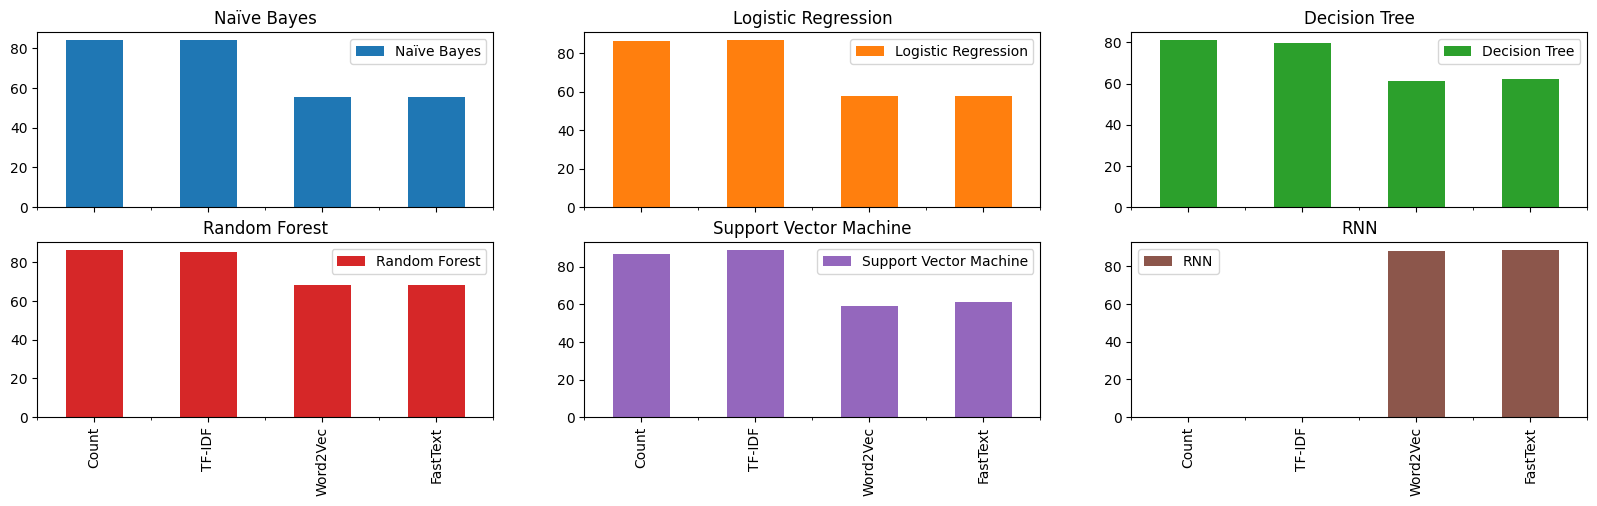

In [ ]:
result_df.plot.bar(subplots=True, figsize=(20, 5), layout=(2,3))

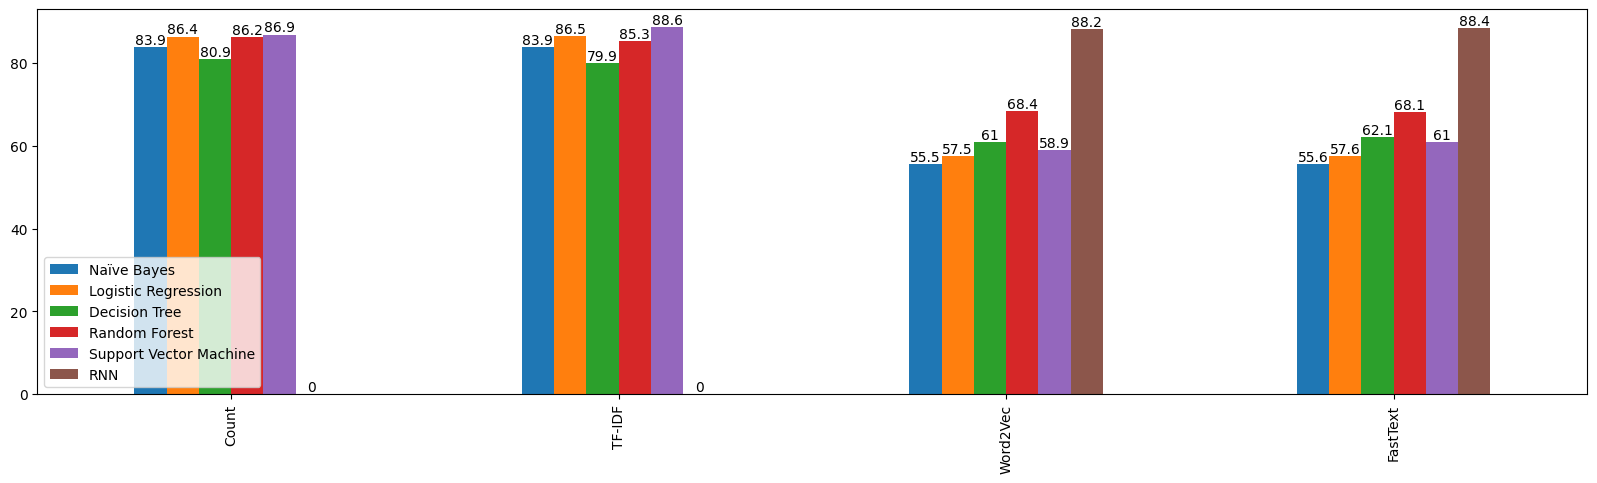

In [ ]:
ax = result_df.plot.bar(figsize=(20, 5), layout=(1,4))
ax.legend(loc=3)


for container in ax.containers:
    ax.bar_label(container)

In [ ]:
transformer_model_result = {
    "2xs": 0.83,
    "xs": 0.92,
    "s": 0.96,
    "m": 0.97,
    "l": 0.98,
    "xl": 0.97,
}

transformer_token_result = {
    "128": 0.97,
    "32": 0.92,
    "16": 0.95,
}

transformer_xlnet = {
    "BERT": 0.92,
    "XLNet": 0.94,
}

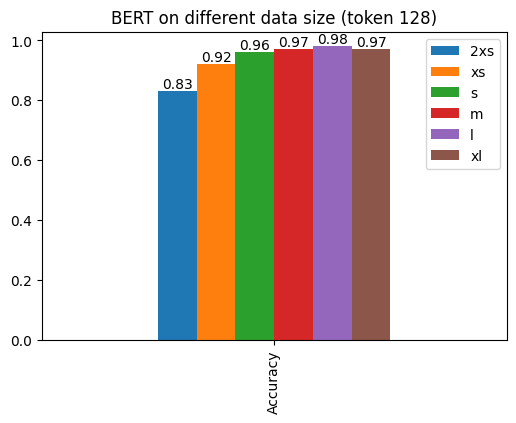

In [ ]:
import pandas as pd

ax = pd.DataFrame(transformer_model_result, index=['Accuracy']).plot.bar(figsize=(6, 4))

for container in ax.containers:
    ax.bar_label(container)

ax.title.set_text('BERT on different data size (token 128)')

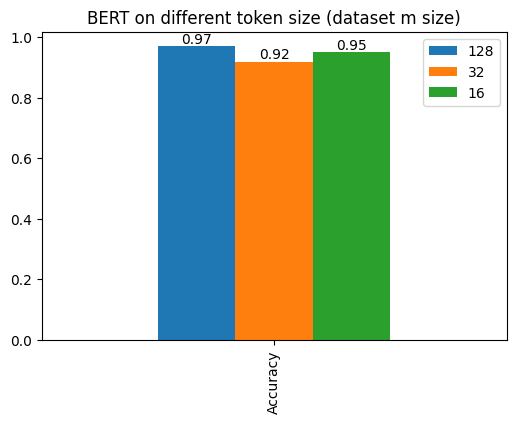

In [ ]:
import pandas as pd

ax = pd.DataFrame(transformer_token_result, index=['Accuracy']).plot.bar(figsize=(6, 4))

for container in ax.containers:
    ax.bar_label(container)
    
ax.title.set_text('BERT on different token size (dataset m size)')

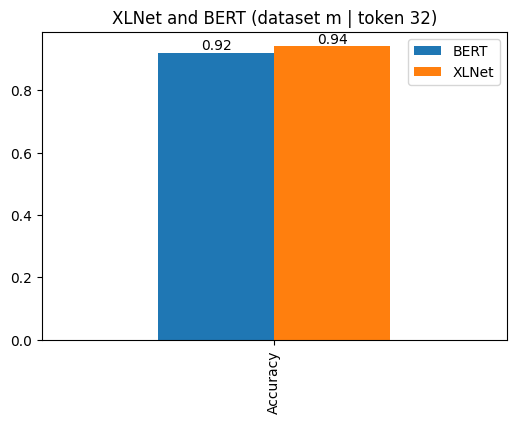

In [ ]:
import pandas as pd

ax = pd.DataFrame(transformer_xlnet, index=['Accuracy']).plot.bar(figsize=(6, 4))

for container in ax.containers:
    ax.bar_label(container)
    
ax.title.set_text('XLNet and BERT (dataset m | token 32)')

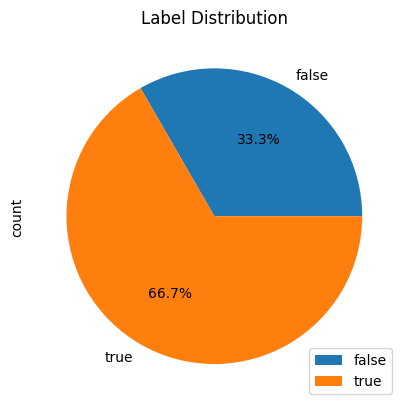

In [ ]:
def func(pct):
    # absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct)
    
    
df = tweets.groupby('label').count().to_pandas().set_index('label')
ax = df.plot.pie(y="count", autopct=lambda pct: func(pct))

ax.set_title('Label Distribution')
for container in ax.containers:
    ax.bar_label(container)
    
ax.legend(loc=4)


In [66]:
text_length = tweets.select(
    [
        # pl.col("processed_text").arr.lengths().alias("Processed Text Length"),
        # pl.col("processed_text").arr.join(' ').str.n_chars().alias("Processed Text Character"),
        # pl.col("text").str.split(' ').arr.lengths().alias("Raw Text Length"),
        pl.col("text").str.n_chars().alias("Raw Text Character"),
        pl.col("label"),
    ]
).to_pandas()
text_length

,Raw Text Character,label
0,198,false
1,116,false
2,155,false
3,217,false
4,108,false
...,...,...
1434570,292,true
1434571,221,true
1434572,116,true
1434573,256,true


In [35]:
text_length['label']

0          false
1          false
2          false
3          false
4          false
           ...  
1434570     true
1434571     true
1434572     true
1434573     true
1434574     true
Name: label, Length: 1434575, dtype: object

In [36]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

text_length.describe()

NameError: name 'pd' is not defined

In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
a = text_length[text_length['label'] == 'true']
b = text_length[text_length['label'] == 'false']

a

,Raw Text Character,label
478069,115,true
478070,128,true
478071,139,true
478072,181,true
478073,279,true
...,...,...
1434570,292,true
1434571,221,true
1434572,116,true
1434573,256,true


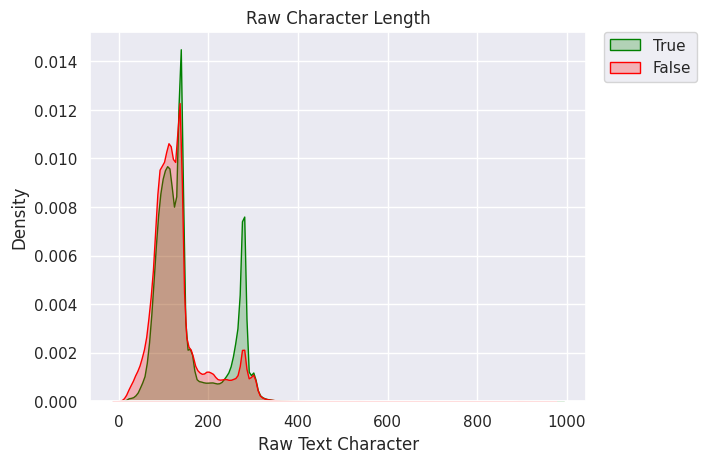

In [69]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# plotting both distibutions on the same figure
fig, ax = plt.subplots()

sns.kdeplot(data=a['Raw Text Character'], ax=ax, color='green', fill=True, label='True')
sns.kdeplot(data=b['Raw Text Character'], ax=ax, color='red', fill=True, label='False')

ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

ax.set_title('Raw Character Length')

plt.show()

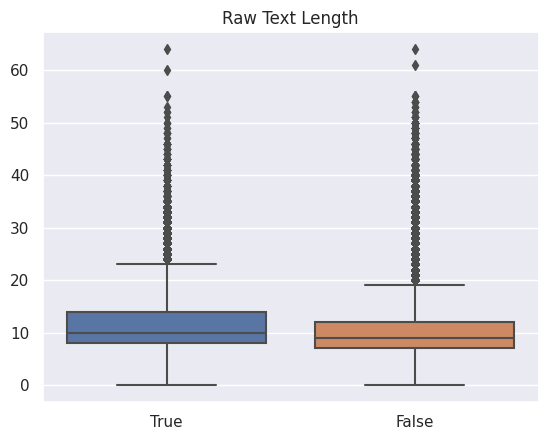

In [59]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# plotting both distibutions on the same figure
fig, ax = plt.subplots()

sns.boxplot(data=[a['Processed Text Length'], b['Processed Text Length']])
# sns.boxplot(data=b['Processed Text Length'], ax=ax, color='red', fill=True, label='False')

# ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

ax.set_xticklabels(['True', 'False'])

ax.set_title('Raw Text Length')

plt.show()

In [70]:
tweets.columns

['lang',
 'id',
 'entities',
 'public_metrics',
 'context_annotations',
 'possibly_sensitive',
 'created_at',
 'author_id',
 'text',
 'conversation_id',
 'edit_history_tweet_ids',
 'reply_settings',
 'in_reply_to_user_id',
 'referenced_tweets',
 'geo',
 'withheld',
 'label',
 'processed_text']

In [85]:
hashtags = tweets.select([pl.col('entities'), 'label']).unnest('entities').select([
    pl.col('hashtags').arr.lengths().alias('Number of Hashtags'),
    pl.col('label')
]).to_pandas()

In [94]:
hashtags_true = hashtags[hashtags['label'] == 'true']['Number of Hashtags'][hashtags['Number of Hashtags'] > 0]
hashtags_false = hashtags[hashtags['label'] == 'false']['Number of Hashtags'][hashtags['Number of Hashtags'] > 0]

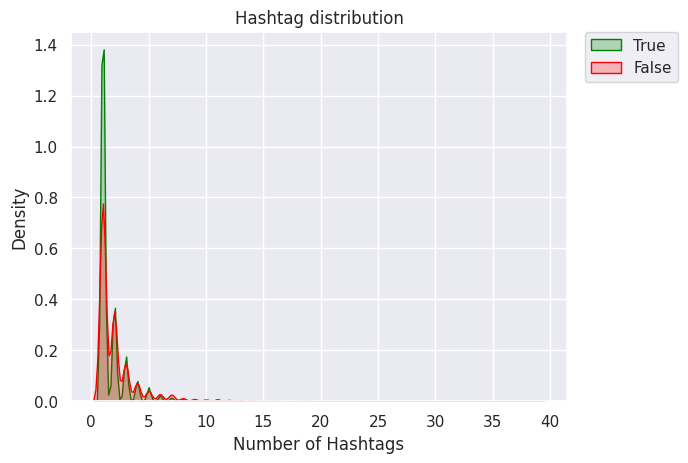

In [95]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# plotting both distibutions on the same figure
fig, ax = plt.subplots()

sns.kdeplot(data=hashtags_true, ax=ax, color='green', fill=True, label='True')
sns.kdeplot(data=hashtags_false, ax=ax, color='red', fill=True, label='False')

ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

ax.set_title('Hashtag distribution')

plt.show()

In [101]:
import pandas as pd

pd.DataFrame([hashtags_true, hashtags_false]).T.describe()

,Number of Hashtags,Number of Hashtags
count,124528.000000,90499.000000
mean,1.766583,2.341915
std,1.728317,2.589180
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,3.000000
max,39.000000,32.000000


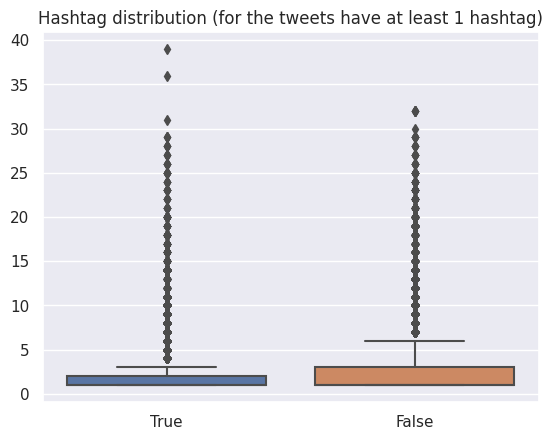

In [97]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# plotting both distibutions on the same figure
fig, ax = plt.subplots()

sns.boxplot(data=[hashtags_true, hashtags_false])
# sns.boxplot(data=b['Processed Text Length'], ax=ax, color='red', fill=True, label='False')

# ax.legend(bbox_to_anchor=(1.02, 1.02), loc='upper left')

ax.set_xticklabels(['True', 'False'])

ax.set_title('Hashtag distribution (for the tweets have at least 1 hashtag)')

plt.show()

In [136]:
true_word = (
    tweets.select(pl.col("processed_text"), "label")
    .explode("processed_text")
    .filter(pl.col("label") == "true")["processed_text"]
    .to_list()
)
fasle_word = (
    tweets.select(pl.col("processed_text"), "label")
    .explode("processed_text")
    .filter(pl.col("label") == "false")["processed_text"]
    .to_list()
)
all_word = (
    tweets.select(pl.col("processed_text"), "label")
    .explode("processed_text")["processed_text"]
    .to_list()
)


In [167]:
from collections import Counter

false_dict = pd.DataFrame([{k: v for k, v in sorted(Counter(fasle_word).items(), key=lambda item: item[1], reverse=True)[:10]}]).T.reset_index()
true_dict = pd.DataFrame([{k: v for k, v in sorted(Counter(true_word).items(), key=lambda item: item[1], reverse=True)[:10]}]).T.reset_index()
all_dict = pd.DataFrame([{k: v for k, v in sorted(Counter(all_word).items(), key=lambda item: item[1], reverse=True)[:10]}]).T.reset_index()

false_dict.columns = ['word', 'count']
true_dict.columns = ['word', 'count']
all_dict.columns = ['word', 'count']

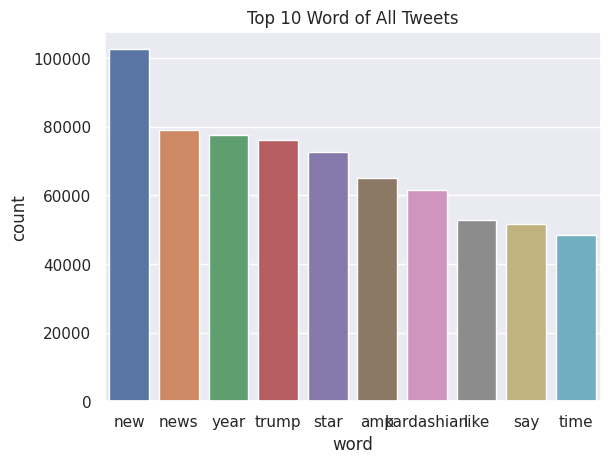

In [169]:

# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt

# plotting both distibutions on the same figure
fig, ax = plt.subplots()

sns.barplot(all_dict, x = "word", y="count", ax=ax)

ax.set_title('Top 10 Word of All Tweets')

plt.show()